In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Fraud.csv")

#Exploring the Data

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#Removing Outliers From Dataset

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

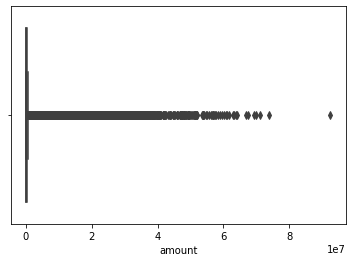

In [8]:
sns.boxplot(df['amount'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

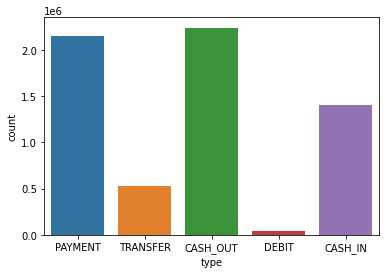

In [9]:
sns.countplot(df['type'])

In [10]:
print("Total Unique Values in nameOrig", df['nameOrig'].nunique())

Total Unique Values in nameOrig 6353307


In [11]:
print("Total Unique Values in nameDest", df['nameDest'].nunique())

Total Unique Values in nameDest 2722362


## Observations :


1.Amount Column has Outliers

2.Debit type transaction count is very small

3.Total Unique values in nameOrig is 6353307

4.Total Unique values in nameDest is 2722362

## Multi-Collinearity Checking



In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data_without_text=pd.DataFrame({"step":df.step,
                                "amount":df.amount,
                               "oldbalanceOrg":df.oldbalanceOrg,
                               "newbalanceOrig":df.newbalanceOrig,
                               "oldbalanceDest":df.oldbalanceDest,
                               "newbalanceDest":df.newbalanceDest,
                               "isFraud":df.isFraud,
                               "isFlaggedFraud":df.isFlaggedFraud})
vif_data = pd.DataFrame()
vif_data["feature"] = data_without_text.columns
  
vif_data["VIF"] = [variance_inflation_factor(data_without_text.values, i)
                          for i in range(len(data_without_text.columns))]
  
print(vif_data)

          feature         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


## Observations

-- we can observe that oldbalanceorg" and "newbalanceorig" has high vif value which means they are responsible for creating multi-collinearity


-- also "oldbalanceDest" and "newbalanceDest" also has multi-collinearity





## Solution

We will remove "oldbalnceorg" and "newbalaceorig" and add the difference of column in the data set df and do the same thing for other columns too which are responsible for creating multi-collinearity

In [13]:
from tqdm import tqdm

initial_balance=df["oldbalanceOrg"]
new_balance=df["newbalanceOrig"]
updated_balance=[]

for k in tqdm(range(len(initial_balance))):
    
    
  diff=new_balance[k]-initial_balance[k]


  if diff>0:
      updated_balance.append(0)
  else:
      updated_balance.append(1)

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:33<00:00, 187479.24it/s]


In [14]:
old_dest=df["oldbalanceDest"]
new_dest=df["newbalanceDest"]
updated_dest_bal_change=[]
dest_balance=[]

for i in tqdm(range(len(old_dest))):
    
    
    diff=new_dest[i]-old_dest[i]
    
    
    if diff>0:
        updated_dest_bal_change.append(0)
        dest_balance.append(abs(diff))
    else:
        updated_dest_bal_change.append(1)
        dest_balance.append(abs(diff))

100%|████████████████████████████████████████████████████████████████████| 6362620/6362620 [00:32<00:00, 196667.86it/s]


In [15]:
df["source_balance_change"]=updated_balance
df["destination_balance"]= dest_balance
df["dest_balance_change"]=updated_dest_bal_change

In [16]:
df.drop(["oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"],axis=1,inplace=True)

In [17]:
df.head()

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,source_balance_change,destination_balance,dest_balance_change
0,1,PAYMENT,9839.64,C1231006815,M1979787155,0,0,1,0.0,1
1,1,PAYMENT,1864.28,C1666544295,M2044282225,0,0,1,0.0,1
2,1,TRANSFER,181.00,C1305486145,C553264065,1,0,1,0.0,1
3,1,CASH_OUT,181.00,C840083671,C38997010,1,0,1,21182.0,1
4,1,PAYMENT,11668.14,C2048537720,M1230701703,0,0,1,0.0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   type                   object 
 2   amount                 float64
 3   nameOrig               object 
 4   nameDest               object 
 5   isFraud                int64  
 6   isFlaggedFraud         int64  
 7   source_balance_change  int64  
 8   destination_balance    float64
 9   dest_balance_change    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 485.4+ MB


## Checking collineraity on dataset after removing columns having high variance inflation factor

In [19]:
output=df["isFraud"]
df.drop("isFraud",axis=1,inplace=True)

In [20]:
True_fraud=np.sum(output==1)
False_fraud=np.sum(output==0)
print(True_fraud)
print(False_fraud)


8213
6354407


## The result clearly shows imbalances present in the data so we have to check imabalance data and perform downsampling on data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,output,test_size=0.20,random_state=42)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 9)
(1272524, 9)
(5090096,)
(1272524,)


## Categorical data

In [33]:
from sklearn import preprocessing   
label_encoder1 = preprocessing.LabelEncoder()
label_encoder1.fit(df["type"])
train_type=label_encoder1.transform(x_train["type"])
test_type=label_encoder1.transform(x_test["type"])

In [34]:
label_encoder2=preprocessing.LabelEncoder()
label_encoder2.fit(df["nameOrig"])
train_nameOrig=label_encoder2.transform(x_train["nameOrig"])
test_nameOrig=label_encoder2.transform(x_test["nameOrig"])

In [35]:
label_encoder3=preprocessing.LabelEncoder()
label_encoder3.fit(df["nameDest"])
train_nameDest=label_encoder3.transform(x_train["nameDest"])
test_nameDest=label_encoder3.transform(x_test["nameDest"])

In [36]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

C:\Users\Deepanshu\AppData\Local\Temp/ipykernel_21484/2064564252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["type"]=train_type
C:\Users\Deepanshu\AppData\Local\Temp/ipykernel_21484/2064564252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["nameOrig"]=train_nameOrig
C:\Users\Deepanshu\AppData\Local\Temp/ipykernel_21484/2064564252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [38]:
x_train.head()

,step,amount,isFlaggedFraud,source_balance_change,destination_balance,dest_balance_change,type,nameOrig,nameDest
6271196,619,386385.08,0,0,386385.08,1,0,4449199,289167
1888243,164,212458.78,0,0,212458.78,1,0,5813773,204382
5549957,382,19967.60,0,1,0.00,1,3,5870502,1346491
2025342,180,527616.51,0,1,527616.51,0,1,5095916,446948
682342,36,206067.85,0,1,206067.84,0,4,5557736,338417


In [39]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

D:\anaconda\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
x_test.head()

,step,amount,isFlaggedFraud,source_balance_change,destination_balance,dest_balance_change
3737323,278,330218.42,0,0,330218.42,1
264914,15,11647.08,0,1,0.00,1
85647,10,152264.21,0,0,152264.21,1
5899326,403,1551760.63,0,1,1551760.63,0
2544263,206,78172.30,0,0,78172.30,1


In [44]:
x_train.shape


(5090096, 9)

In [45]:
y_train.shape

(5090096,)

In [46]:
x_test.shape

(1272524, 6)

In [47]:
y_test.shape

(1272524,)

## I will use the XGBoost to train the model 

beacuse

Feature scaling is not important in xgboost as here amount can be in any currency

As above we see that, amount Data has very much outliers and xgboost is not influenced by outliers

## Hyperparameter tuning on XGBoost

In [41]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

## Model Training

In [ ]:
from sklearn.metrics import roc_curve, auc

model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [ ]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(probablity, threshould):
  prediction=[]
  for i in probablity:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction


In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [ ]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

## Observations

### 1.) Here the accuracy is very high for both train data and test data


### 2.)  But if we check the confusion matrix we can observe that number of turely classified "isfraud" is very less


### 3.) As we have a imbalaced data we can't totaly depend on this output. To achiever this we have to make the balanced data then we have to check the output. to balance the data we have to perform data balancing by doing ""under sampling""

## Balanced Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler  
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(df,result)

In [ ]:
True_fraud=np.sum(y_res==1)
False_fraud=np.sum(y_res==0)
print(True_fraud)
print(False_fraud)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df["type"])
train_type=le.transform(x_train["type"])
test_type=le.transform(x_test["type"])

In [ ]:
le2=preprocessing.LabelEncoder()
le2.fit(df["nameOrig"])
train_nameOrig=le2.transform(x_train["nameOrig"])
test_nameOrig=le2.transform(x_test["nameOrig"])

In [ ]:
le3=preprocessing.LabelEncoder()
le3.fit(df["nameDest"])
train_nameDest=le3.transform(x_train["nameDest"])
test_nameDest=le3.transform(x_test["nameDest"])

In [ ]:
x_train.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [ ]:
x_train["type"]=train_type
x_train["nameOrig"]=train_nameOrig
x_train["nameDest"]=train_nameDest

In [ ]:
x_test.drop(["type","nameOrig","nameDest"],axis=1,inplace=True)

In [ ]:
x_test["type"]=test_type
x_test["nameOrig"]=test_nameOrig
x_test["nameDest"]=test_nameDest

In [ ]:
import xgboost as xgb
xgb_model  = xgb.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,2,3,4] }
clf = GridSearchCV(xgb.XGBClassifier(), parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf.fit(x_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
max_depth=[1,2,3,4]
df=pd.DataFrame.from_dict(clf.cv_results_)
train_auc=df['mean_train_score']
test_auc=df['mean_test_score']
plt.grid()
plt.plot(max_depth,train_auc,label="Train-Auc")
plt.plot(max_depth,test_auc,label="Test-Auc")
plt.legend()
plt.title("Depth vs Auc")
print("Best Parameter",clf.best_params_)

In [ ]:
from sklearn.metrics import roc_curve, auc

model_set=xgb.XGBClassifier(max_depth=4)
model_set.fit(x_train,y_train)
y_train_probs = model_set.predict_proba(x_train)[:,1] # converting train and test output into probability
y_test_probs= model_set.predict_proba(x_test)[:,1]
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_probs) # storing values of fpr and tpr
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(8,6))
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)


In [ ]:
def find_best_threshold(threshould, fpr, tpr):
 t = threshould[np.argmax(tpr*(1-fpr))]
 print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
 return t
def predict_with_best_t(proba, threshould):
  prediction=[]
  for i in proba:
    if i>=threshould:
      prediction.append(1)
    else:
      prediction.append(0)
  return prediction

In [ ]:
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
l=predict_with_best_t(y_train_probs, best_t)
k=confusion_matrix(y_train,l)
print(k)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Train data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Blues')

In [ ]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
print("Test confusion matrix")
l=predict_with_best_t(y_test_probs, best_t)
k=confusion_matrix(y_test,l)
print(k)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.title("Test data ")
sns.heatmap(k, annot=True,fmt="d",cmap='Oranges')

# Result

### 1.) Here,the accuracy is very high

### 2.) Here from confusion matrix we can conclude that it possess good value in Truepositive and TrueNegetive.

### 3.) As it's a balanced data, we can say that it will work well in unseen data

### 4.) For prevention, we should look into the FN values. if it is very high then we have tp add some other system